In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
final = pd.read_csv('final.csv')
matched = pd.read_csv('matched.csv')

In [3]:
final.dropna(inplace=True)
matched.dropna(inplace=True)

In my EDA and Preprocessing notebook I spun up a lot of plots to see if there were any sort of conclusions or correlations that I could find to either support or disprove the notion that critics' reviews and the sentiment of these reviews have any affect on a show's success or failure. In this notebook, I'm pulling the visualizations that have any kind of significant meaning in relation to this problem.

### By Genre

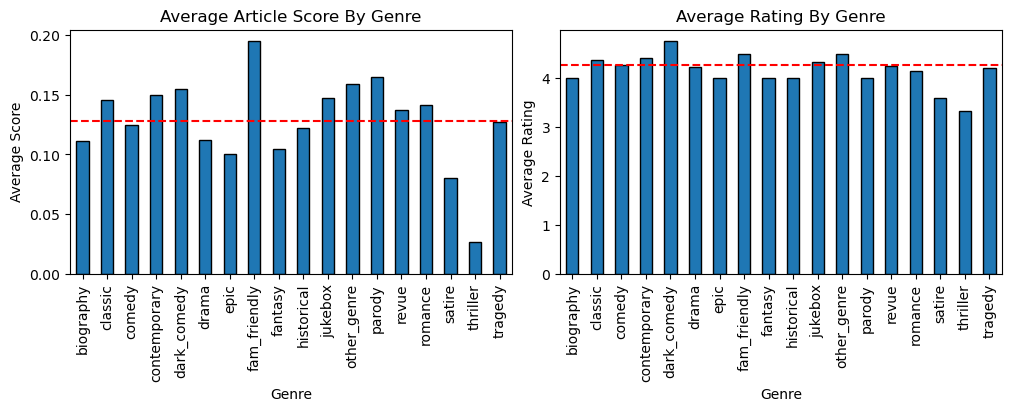

In [4]:
article_score =  matched.groupby('genre')['article_score'].mean(numeric_only=True)
score_mean = matched['article_score'].mean()
avg_rating = matched.groupby('genre')['rating'].mean(numeric_only=True)
rating_mean = matched['rating'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
article_score.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(score_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

avg_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(rating_mean, color='red', linestyle='--')

axs[1].set_title('Average Rating By Genre')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Average Rating')
plt.show()

The correlation value between article score and rating was low, but I still wanted to see the two side by side. The low variance in genre rating isn't especially helpful in this situation.

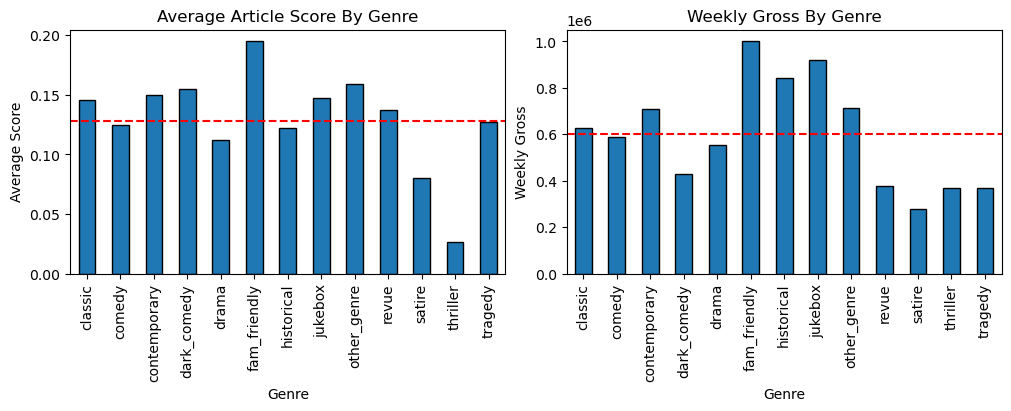

In [5]:
exclude_genres = ['biography', 'epic', 'fantasy', 'parody', 'romance']
avg_genre_score = matched[~matched['genre'].isin(exclude_genres)].groupby('genre')['article_score'].mean(numeric_only=True)
score_mean = matched['article_score'].mean()
avg_genre_gross = final.groupby('genre')['week_gross'].mean(numeric_only=True)
genre_mean = final['week_gross'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')

avg_genre_score.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(score_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

avg_genre_gross.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(genre_mean, color='red', linestyle='--')

axs[1].set_title('Weekly Gross By Genre')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Weekly Gross')
plt.show()

The heatmap I made to show the correlation of each variable in this dataframe gave article score and weekly gross a correlation of 0.35, which is the third highest correlation on the map for what we are checking for. It unfortunately is still a weak correlation which diverts on a handful of the genres, most notably with dark comedy, revue, thriller, and tragedy.

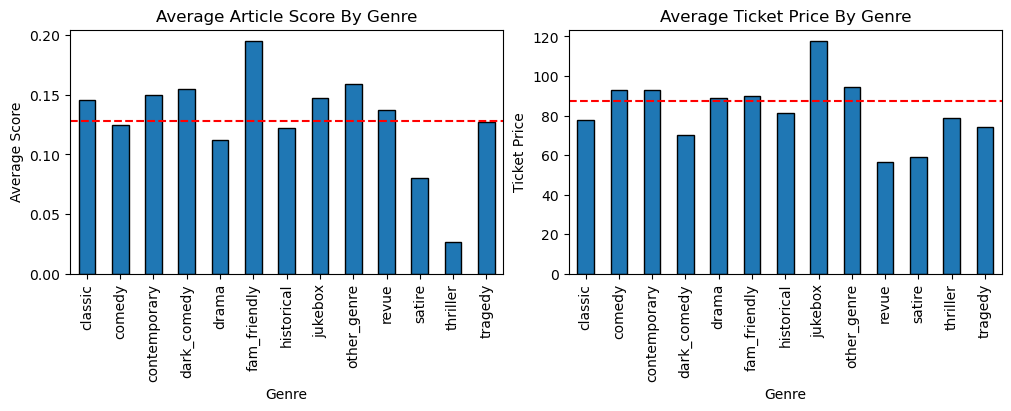

In [6]:
exclude_genres = ['biography', 'epic', 'fantasy', 'parody', 'romance']
avg_genre_score = matched[~matched['genre'].isin(exclude_genres)].groupby('genre')['article_score'].mean(numeric_only=True)
score_mean = matched['article_score'].mean()
avg_ticket = final.groupby('genre')['avg_ticket'].mean(numeric_only=True)
ticket_mean = final['avg_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')

avg_genre_score.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(score_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

avg_ticket.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(ticket_mean, color='red', linestyle='--')

axs[1].set_title('Average Ticket Price By Genre')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Ticket Price')
plt.show()

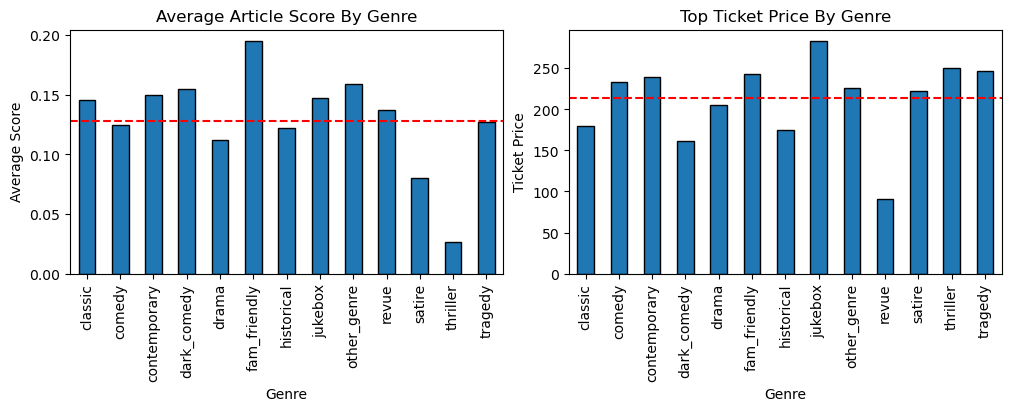

In [7]:
exclude_genres = ['biography', 'epic', 'fantasy', 'parody', 'romance']
avg_genre_score = matched[~matched['genre'].isin(exclude_genres)].groupby('genre')['article_score'].mean(numeric_only=True)
score_mean = matched['article_score'].mean()
top_ticket = final.groupby('genre')['top_ticket'].mean(numeric_only=True)
ticket_mean = final['top_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')

avg_genre_score.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(score_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

top_ticket.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(ticket_mean, color='red', linestyle='--')

axs[1].set_title('Top Ticket Price By Genre')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Ticket Price')
plt.show()

Average ticket price and top ticket price weren't particularly notable in their correlation scores and it's actually interesting to see how much they DON'T have an effect on each other. Especially for the thriller genre - despite it having a low sentiment score, thriller shows' average and top ticket prices are relatively high. The inverse is true with revue - it scored above the overall mean in sentiment but is well below the overall mean for both average and top ticket prices.

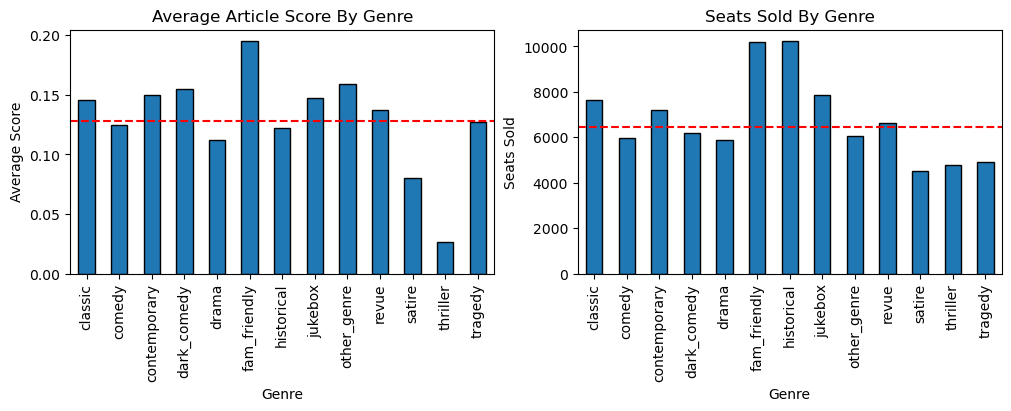

In [8]:
exclude_genres = ['biography', 'epic', 'fantasy', 'parody', 'romance']
avg_genre_score = matched[~matched['genre'].isin(exclude_genres)].groupby('genre')['article_score'].mean(numeric_only=True)
score_mean = matched['article_score'].mean()
seats_sold = final.groupby('genre')['seats_sold'].mean(numeric_only=True)
seats_mean = final['seats_sold'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')

avg_genre_score.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(score_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

seats_sold.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(seats_mean, color='red', linestyle='--')

axs[1].set_title('Seats Sold By Genre')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Seats Sold')
plt.show()

Seats sold and article score had the highest correlation value on the heatmap at 0.42. Even though it's the highest value, it's still a relatively low correlation score when the highest is 1 - and the low correlation is fairly evident especially when looking at the historical and thriller genres. 

### By Show Type

Out of curiosity I wanted to see what would happen if I divided the data by show type instead of genre - unfortunately, it just points to the fact that article sentiment doesn't nearly have as much of an influence as one might have thought before taking a look at this data.

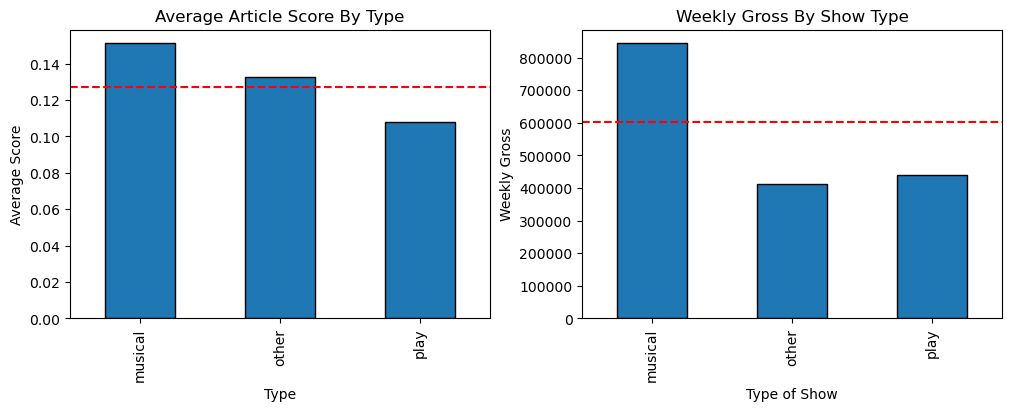

In [9]:
avg_type_rating = final.groupby('type')['article_score'].mean(numeric_only=True)
type_mean = final['article_score'].mean()
avg_type_gross = final.groupby('type')['week_gross'].mean(numeric_only=True)
gross_mean = final['week_gross'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(type_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Type')
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Average Score')

avg_type_gross.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(gross_mean, color='red', linestyle='--')

axs[1].set_title('Weekly Gross By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Weekly Gross')
plt.show()

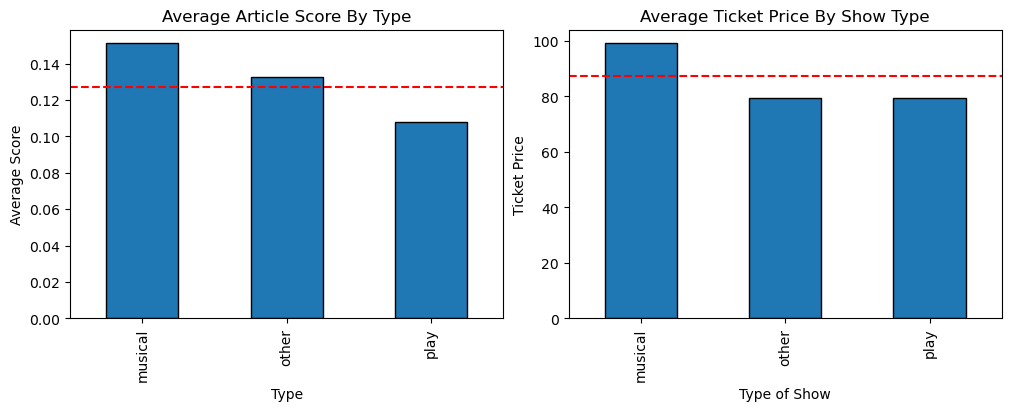

In [10]:
avg_type_rating = final.groupby('type')['article_score'].mean(numeric_only=True)
type_mean = final['article_score'].mean()
avg_ticket = final.groupby('type')['avg_ticket'].mean(numeric_only=True)
ticket_mean = final['avg_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(type_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Type')
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Average Score')

avg_ticket.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(ticket_mean, color='red', linestyle='--')

axs[1].set_title('Average Ticket Price By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Ticket Price')
plt.show()

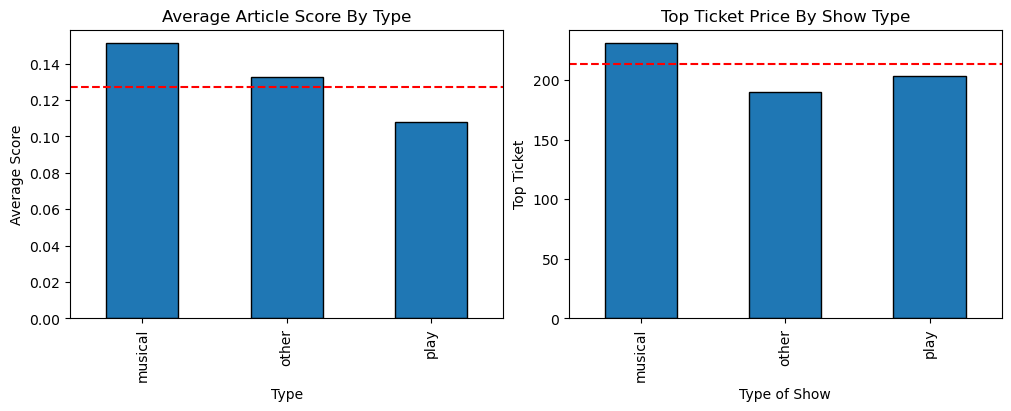

In [11]:
avg_type_rating = final.groupby('type')['article_score'].mean(numeric_only=True)
type_mean = final['article_score'].mean()
top_ticket = final.groupby('type')['top_ticket'].mean(numeric_only=True)
ticket_mean = final['top_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(type_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Type')
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Average Score')

top_ticket.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(ticket_mean, color='red', linestyle='--')

axs[1].set_title('Top Ticket Price By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Top Ticket')
plt.show()

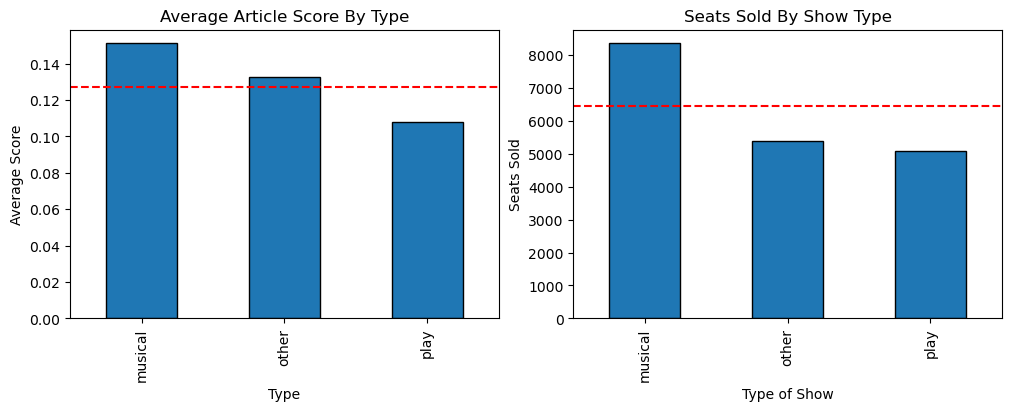

In [12]:
avg_type_rating = final.groupby('type')['article_score'].mean(numeric_only=True)
type_mean = final['article_score'].mean()
seats_sold = final.groupby('type')['seats_sold'].mean(numeric_only=True)
seats_mean = final['seats_sold'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(type_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score By Type')
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Average Score')

seats_sold.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(seats_mean, color='red', linestyle='--')

axs[1].set_title('Seats Sold By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Seats Sold')
plt.show()